# Statistical Moments (and their friends)
[![Latest release](https://badgen.net/github/release/Naereen/Strapdown.js)](https://github.com/dmhuehol/ev228-analysis-environmental-data/tree/main/code)
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://githubtocolab.com/dmhuehol/ev228-analysis-environmental-data/blob/main/code/statistical_moments.ipynb)  
*This code is made available under an MIT License, included as the LICENSE file in this repository.*

This example explores the statistical moments of a distribution. Moments
refer to descriptive statistics that characterize aspects of the shape of a
distribution. We will describe four moments in detail: the mean, variance, skewness, and
kurtosis.

The code additionally describes two other kinds of non-moment
descriptive statistics: quantiles (and the specific case of medians) and the
standard deviation.

In [1]:
#.............................................
# IMPORT STATEMENTS
#.............................................
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

#.............................................
# PLOTTING COMMANDS
#.............................................
import matplotlib as mpl

# set figure defaults
mpl.rcParams['figure.dpi'] = 150
plt.rcParams['figure.figsize'] = (12.0/2, 10.0/2)

To begin, we generate a random variable of length 10,000 and plot its
probability distribution. (See the `what_is_pdf` notebook in this repository
for more on this.)

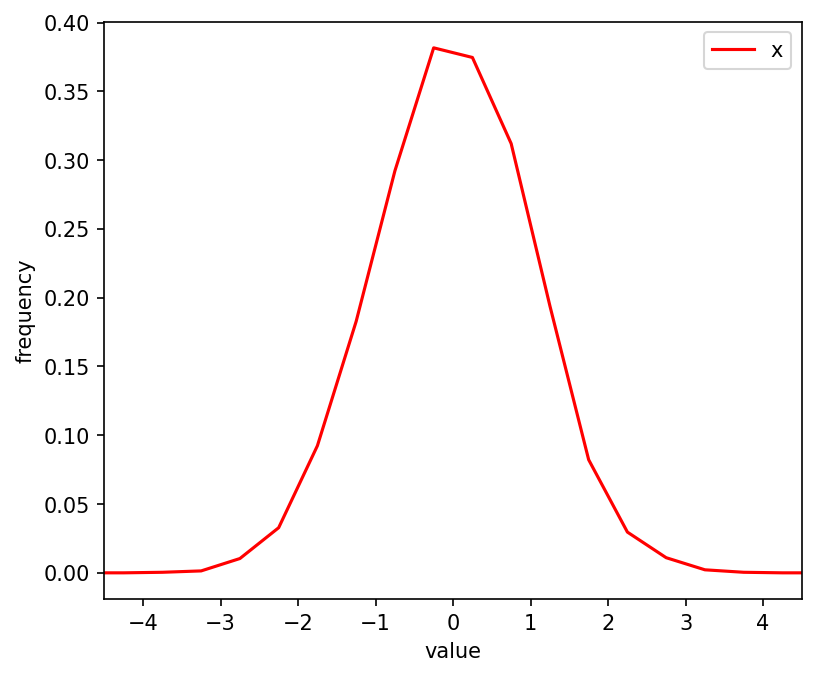

In [2]:
x = np.random.normal(0, 1, size=(10000,))

binwidth = 0.5
x_bins = np.arange(-20, 20, binwidth)
hx = np.histogram(x, x_bins)

plt.figure()

x_vals = hx[1][:-1]
fvalsx = hx[0].astype(float) / (np.size(x) * binwidth)
plt.plot(x_vals + binwidth / 2, fvalsx, color='red', label='x')
plt.xlabel('value')
plt.xlim(-4.5, 4.5)
plt.ylabel('frequency')
plt.legend()
plt.show()

We are now ready to describe the moments of this distribution!

### 1. The first moment
The first moment of the distribution is the **mean**. It denotes the central
value of the distribution relative to its extremes.  

The mean for a random variable X can be calculated mathematically as:
$$ \bar{X} = \frac{1}{n} \sum_{i=1}^{n} x_i = \frac{x_1 + x_2 + x_3 + ... + x_n}{n} $$

You may have computed the mean for a dataset by hand in previous math classes
in middle school or high school. Now, we can automate the calculation using
code. The `numpy` package contains functions to calculate many common
statistical quantities, including the mean.

In [ ]:
x_mean = np.mean(x)
print(x_mean)

We can plot this on the figure. You can see that the mean lies at the center of the distribution: half of the probability (area under the curve) lies above the mean, and half lies below the mean!

In [ ]:
fig = plt.figure()

x_vals = hx[1][:-1]
fvalsx = hx[0].astype(float) / (np.size(x) * binwidth)
plt.plot(x_vals + binwidth / 2, fvalsx, color='red', label='x')
plt.plot([x_mean, x_mean], [0, np.max(fvalsx)], color='#e46c32', label='mean')
plt.xlabel('value')
plt.xlim(-4.5, 4.5)
plt.ylabel('frequency')
plt.legend()
plt.show()

**Activity: Write your own function that calculates the mean of an array of
values. Test it to ensure it returns the same value as the `np.mean` function.**

In [ ]:
#  Write your function to calculate the mean here


#### 1a. The median
The median is an alternate way to represent the central value of the
distribution. It represents the middle value when the data is sorted.

In [ ]:
x_median = np.quantile(x, 0.5)
print(x_median)

In the normal distribution, the median and the mean are very similar to each
other. For distributions with a large number of extreme values, the median and
mean may be very different! In these cases, the median is less sensitive to the
extreme values and usually represents a better estimate of the central value of
the distribution. Later in this notebook when we change the distribution you
may be able to notice these differences.

In [ ]:
fig = plt.figure()

x_vals = hx[1][:-1]
fvalsx = hx[0].astype(float) / (np.size(x) * binwidth)
plt.plot(x_vals + binwidth / 2, fvalsx, color='red', label='x')
plt.plot([x_mean, x_mean], [0, np.max(fvalsx)], color='#e46c32', label='mean')
plt.plot([x_median, x_median], [0, np.max(fvalsx)], color='#6e7aaa', label='median')
plt.xlabel('value')
plt.xlim(-4.5, 4.5)
plt.ylabel('frequency')
plt.legend()
plt.show()

Technically the median is a *quantile*--specifically, the 0.5th quantile. We
can define quantiles for any value between 0 and 1. For example, the 0.2th
quantile separates the lowest 20% of the distribution from the upper 80%.

**QUESTION: What quantile corresponds to a value of approximately 2?**

In [ ]:
q = 0.2
x_quantile = np.quantile(x, q)
print(x_quantile)

In [ ]:
fig = plt.figure()

x_vals = hx[1][:-1]
fvalsx = hx[0].astype(float) / (np.size(x) * binwidth)
plt.plot(x_vals + binwidth / 2, fvalsx, color='red', label='x')
plt.plot(
    [x_mean, x_mean], [0, np.max(fvalsx)], color='#e46c32', label='mean')
str_quant = 'quantile: ' + str(q)
plt.plot(
    [x_quantile, x_quantile], [0, np.max(fvalsx)], color='#6e7aaa',
    label=str_quant)
plt.xlabel('value')
plt.xlim(-4.5, 4.5)
plt.ylabel('frequency')
plt.legend()
plt.show()

### 2. The second moment
The second moment of the distribution is the **variance**. It measures how much
range the distribution has relative to its mean.

In [ ]:
x_variance = np.var(x)
print(x_variance)

As stated above, the variance represents the average deviation from the mean.
One way to visualize this is by shading the region around the mean
corresponding to the variance in the positive and negative direction.

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

x_vals = hx[1][:-1]
fvalsx = hx[0].astype(float) / (np.size(x) * binwidth)
plt.plot(x_vals + binwidth / 2, fvalsx, color='red', label='x')
plt.plot([x_mean, x_mean], [0, np.max(fvalsx)], color='#e46c32', label='mean')
ax.fill_between([x_mean - x_variance, x_mean + x_variance], [np.max(fvalsx), np.max(fvalsx)], edgecolor=None, color='#5eb298', alpha=0.5)
plt.xlabel('value')
plt.xlim(-4.5, 4.5)
plt.ylabel('frequency')
plt.legend()
plt.show()

**ACTIVITY: Adjust the bounds of the plot so there is no whitespace around the
edges of the figure.**

Variance is usually expressed instead as a closely-related statistic called the
*standard deviation*. The standard deviation is the square root of variance.

The reason we typically use standard deviation is because the units of variance
are the square of the starting units. In this example, our values are unitless
so this is inconsequential. But, for data that represents a physical quantity
it is much easier to interpret the standard deviation because its units will
match those of the original measurements.

**ACTIVITY: Verify that the standard deviation is equal to the square root of
the variance. You may need to look up the numpy function to calculate a square
root.**

In [ ]:
x_stdev = np.std(x)
print(x_stdev)

### 3. The third moment
The third moment of the distribution is the **skewness**. It measures how
skewed the distribution is relative to the center; this is often described as
the "lopsidedness" of the distribution.

In [ ]:
x_skewness = stats.skew(x)
print(x_skewness)

A distribution with a skewness of zero is perfectly evenly distributed around
the mean. The values we draw from the normal distribution by default are close
to a skewness of zero, though not perfectly equal to this value. The figure
below displays the distribution of the data, the mean, and skewness in the
title.

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

x_vals = hx[1][:-1]
fvalsx = hx[0].astype(float) / (np.size(x) * binwidth)
plt.plot(x_vals + binwidth / 2, fvalsx, color='red', label='x')
plt.plot([x_mean, x_mean], [0, np.max(fvalsx)], color='#e46c32', label='mean')
plt.xlabel('value')
plt.xlim(-4.5, 4.5)
plt.ylabel('frequency')
plt.legend()
plt.title('skewness: ' + str(np.round(x_skewness, 3)))
plt.show()

### 4. The fourth moment
The fourth moment of the distribution is the **kurtosis**. Kurtosis describes
the area under the curve inside the "tails" of the distribution.

In [ ]:
x_kurtosis = stats.kurtosis(x)
print(x_kurtosis)

A distribution with a kurtosis of zero has no tails. As with skewness, the
values we draw from the normal distribution by default have close to zero
kurtosis. The figure below displays the distribution of the
data with the kurtosis in the title.

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

x_vals = hx[1][:-1]
fvalsx = hx[0].astype(float) / (np.size(x) * binwidth)
plt.plot(x_vals + binwidth / 2, fvalsx, color='red', label='x')
plt.xlabel('value')
plt.xlim(-4.5, 4.5)
plt.ylabel('frequency')
plt.legend()
plt.title('kurtosis: ' + str(np.round(x_kurtosis, 3)))
plt.show()

 #### A warning about kurtosis!
Many resources online describe kurtosis as the "peakedness" of the
distribution. This misinterpretation dates back to the 19th century and is not
correct. Peakedness and kurtosis are unrelated properties. Kurtosis describes
the tails of the distribution, not the peak(s).

The exact reasons for this misconception go beyond the scope of this course. If
you'd like to learn more, please come to my office hours or read:

* Westfall 2014 "Kurtosis as Peakedness, 1905-2014. R.I.P." *The American
Statistician* [doi.org/10.1080/00031305.2014.917055](doi.org/10.1080/00031305.2014.917055)

### 5. Why do we call these the first/second/third/fourth moment of the distribution?

The naming of these quantities comes from their mathematical definition. Each
moment is defined as the *n*-th power of a quantity derived from the
probability distribution function.

#### Mean: The First Moment
$$ \bar{X} = \frac{1}{n} \sum_{i=1}^{n} x_i $$

#### Variance: The Second Moment
$$ \bar{X} = \frac{1}{n} \sum_{i=1}^{n} x_i^2 $$

#### Skewness: The Third Moment
$$ \bar{X} = \frac{1}{n} \sum_{i=1}^{n} x_i^3 $$

#### Kurtosis: The Fourth Moment
$$ \bar{X} = \frac{1}{n} \sum_{i=1}^{n} x_i^4 $$

#### Moment Generating Equation
$$ m_r = \frac{1}{n} \sum_{i=1}^{n} x_i^r $$

We can use these formulae to calculate the moments by hand. Automating this
through code simplifies the calculation for large datasets and higher moments.

One can continue to define moments for powers beyond kurtosis. Even-numbered
powers continue to represent variance while odd powers represent skewness, and
the quantities become more and more sensitive to extreme values. However, these
higher-order moments have few practical applications.

There are other key descriptive statistics that do not correspond to moments.
The standard deviation, quantiles, median, and mode are three which are  
commonly encountered and will be explored in another notebook.

**ACTIVITY: Go back to the cell where we define the distribution for our random
variable. Change the distribution to have a mean of 1 and a standard deviation
of 3. Repeat the code in the notebook and see how the distribution and its
descriptive statistics change.**

**ACTIVITY: Go back to the cell where we define the distribution for our random
variable. Change the distribution to a gamma distribution with a mean of 1 and
a scale of 3. The gamma distribution is another kind of statistical
distribution which is commonly encountered in data science. Repeat the code in
the notebook and see how the distribution and its descriptive statistics
change.**

## Practical 1
**This cell describes the exercise for Practical 1.**

Change the distribution in some new way and repeat the notebook. You may
either change the inputs to the `np.random.normal` function or choose another
probability distribution available in `numpy`. The list of distributions in
numpy are available at the following link:
https://numpy.org/doc/stable/reference/random/legacy.html#distributions. (If
you'd like to try another distribution, the Laplace, logistic, and Wald are
especially fun choices that are relatively straightforward to use.)

In the text field for the "Practical 1: Distributions and Moments; Descriptive
Statistics" assignment on Canvas, please enter the following information:  
    1. Describe the distribution that you used in natural language (e.g., for the default distribution this would be "a normal distribution with a mean of 0 and standard deviation of 1")  
    2. Include the line of code where you generate your random variable (e.g., for the default distribution this would be `x = np.random.normal(0, 1, size=(10000,))`)  
    3. Provide the values of the mean, *standard deviation* (not variance!), skewness, and kurtosis of your distribution each to three decimal places  

